# Check GPU usage

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'nvidia-driver-550-server' for glob 'nvidia*'
Note, selecting 'nvidia-firmware-535-535.154.05' for glob 'nvidia*'
Note, selecting 'nvidia-docker2' for glob 'nvidia*'
Note, selecting 'nvidia-firmware-560-server-560.28.03' for glob 'nvidia*'
Note, selecting 'nvidia-cuda-toolkit-doc' for glob 'nvidia*'
Note, selecting 'nvidia-imex' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-firmware-535-server-535.154.05' for glob 'nvidia*'
Note, selecting 'nvidia-headless-390' for glob 'nvidia*'
Note, selecting 'nvidia-cuda-toolkit-gcc' for glob 'nvidia*'
Note, selecting 'nvidia-headless-418' for glob 'nvidia*'
Note, selecting 'nvidia-headless-430' for glob 'nvidia*'
Note, selecting 'nvidia-headless-435' for glob 'nvidia*'
Note, selecting 'nvidia-headless-440' for glob 'nvidia*'
Note, selecting 'nvidia-headless-450' for glob 'nvidia*'

In [ ]:
# Download the CUDA 11.8 repository package
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
!sudo mv cuda-ubuntu2004.pin /etc/apt/preferences.d/cuda-repository-pin-600

# Add the repository for CUDA 11.8
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/3bf863cc.pub
!sudo add-apt-repository "deb https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/ /"

# Install CUDA 11.8
!sudo apt-get update
!sudo apt-get -y install cuda-11-8


--2024-10-20 18:37:57--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu2004.pin’

cuda-ubuntu2004.pin 100%[===================>]     190  --.-KB/s    in 0s      

2024-10-20 18:37:57 (5.35 MB/s) - ‘cuda-ubuntu2004.pin’ saved [190/190]

Executing: /tmp/apt-key-gpghome.kdIu2u0jEl/gpg.1.sh --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/3bf863cc.pub
gpg: requesting key from 'https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/3bf863cc.pub'
gpg: key A4B469963BF863CC: public key "cudatools <cudatools@nvidia.com>" imported
gpg: Total number processed: 1
gpg:               import

In [ ]:
import os
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.version.cuda)


True
11.8


In [ ]:
!nvidia-smi

Sun Oct 20 19:30:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Environment setup

In [ ]:
!git clone https://github.com/IDEA-Research/DINO.git

Cloning into 'DINO'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 442 (delta 136), reused 95 (delta 95), pack-reused 246 (from 1)
Receiving objects: 100% (442/442), 13.43 MiB | 15.20 MiB/s, done.
Resolving deltas: 100% (191/191), done.


# Link dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/cvpdl_hw1.zip -d /content/

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/train/labels/pexels-photo-7925811.txt  
  inflating: /content/train/labels/pexels-photo-7925813.txt  
  inflating: /content/train/labels/pexels-photo-7925814.txt  
  inflating: /content/train/labels/pexels-photo-7925815.txt  
  inflating: /content/train/labels/pexels-photo-7925816.txt  
  inflating: /content/train/labels/pexels-photo-7925821.txt  
  inflating: /content/train/labels/pexels-photo-7925822.txt  
  inflating: /content/train/labels/pexels-photo-7925824.txt  
  inflating: /content/train/labels/pexels-photo-7925825.txt  
 extracting: /content/train/labels/pexels-photo-7925827.txt  
  inflating: /content/train/labels/pexels-photo-7925828.txt  
  inflating: /content/train/labels/pexels-photo-7925829.txt  
  inflating: /content/train/labels/pexels-photo-7925830.txt  
  inflating: /content/train/labels/pexels-photo-7925831.txt  
  inflating: /content/train/labels/pexels-photo-7925832.txt  
  inflating: /content/train/labels/pexels-photo-7

In [ ]:
!mkdir dataset

In [ ]:
!mv ./train/ dataset/
!mv ./valid/ dataset/

In [ ]:
%cd dataset
!mkdir annotations

/content/dataset


In [ ]:
!rm -rf ./train/

In [ ]:
!rm -rf ./valid/

In [ ]:
!cp /content/drive/MyDrive/instances_train2017.json /content/dataset/annotations/
!cp /content/drive/MyDrive/instances_val2017.json /content/dataset/annotations/

# Environment Setup

In [ ]:
%cd ../DINO/

/content/DINO


In [ ]:
!pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
%cd DINO

/content/DINO


In [ ]:
!pip install -r requirements.txt

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-yulnxb4t/pycocotools_6a64c58fab534e858347dd6998eedb5e
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-yulnxb4t/pycocotools_6a64c58fab534e858347dd6998eedb5e
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-yulnxb4t/panopticapi_a0aa94bff4b5483b8a83f7238c709188
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-install-yulnxb4t/panopticapi_a0aa94bff4b5483b8a83f7238c709188
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install ninja

In [ ]:
!pip install yapf==0.40.1

In [ ]:
%cd models/dino/ops
!python setup.py build install
!python test.py
%cd ../../../

/content/DINO/models/dino/ops
running build
running build_py
copying functions/__init__.py -> build/lib.linux-x86_64-cpython-310/functions
copying functions/ms_deform_attn_func.py -> build/lib.linux-x86_64-cpython-310/functions
copying modules/__init__.py -> build/lib.linux-x86_64-cpython-310/modules
copying modules/ms_deform_attn.py -> build/lib.linux-x86_64-cpython-310/modules
running build_ext
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:424: UserWarning: There are no x86_64-linux-gnu-g++ version bounds defined for CUDA version 11.8
  warnings.warn(f'There are no {compiler_name} version bounds defined for CUDA version {cuda_str_version}')
building 'MultiScaleDeformableAttention' extension
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1965: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Emittin

In [ ]:
!bash scripts/DINO_train_swin.sh /content/dataset /content/drive/MyDrive/backbone

Not using distributed mode
Loading config file from config/DINO/DINO_4scale_swin.py
[10/21 11:51:58.491]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: has uncommited changes, branch: main

[10/21 11:51:58.491]: Command: main.py --output_dir logs/DINO/R50-MS4-12epoch -c config/DINO/DINO_4scale_swin.py --coco_path /content/dataset --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0 backbone_dir=/content/drive/MyDrive/backbone --pretrain_model_path /content/DINO/logs/DINO/R50-MS4-9epoch/checkpoint_best_regular.pth --finetune_ignore lable_enc.weight class_embed
[10/21 11:51:58.492]: Full config saved to logs/DINO/R50-MS4-12epoch/config_args_all.json
[10/21 11:51:58.492]: world size: 1
[10/21 11:51:58.493]: rank: 0
[10/21 11:51:58.493]: local_rank: 0
[10/21 11:51:58.493]: args: Namespace(config_file='config/DINO/DINO_4scale_swin.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_b

# Inference

In [ ]:
model_config_path = "/content/DINO/config/DINO/DINO_4scale_swin.py"
model_checkpoint_path = "/content/DINO/logs/DINO/R50-MS4-9epoch/checkpoint_best_regular.pth"

In [ ]:
%cd /content/DINO

/content/DINO


In [ ]:
import torch, json
from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops
args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

use_checkpoint!!!!!!!!!!!!!!!!!!!!!!!!


<ipython-input-14-da74ac2c6809>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint_path, map_location='cpu')


## Load datasets

In [ ]:
args.dataset_file = 'coco'
args.coco_path = '/content/dataset'
args.fix_size = False

dataset_val = build_dataset(image_set = 'val', args = args)

data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=0.40s)
creating index...
index created!


In [ ]:
!cp /content/drive/MyDrive/coco_id2name.json ./

In [ ]:
with open("/content/DINO/coco_id2name.json") as f:
  id2name = json.load(f)
  id2name = {int(k):v for k,v in id2name.items()}

## Test

In [ ]:
print(dataset_val[1])

(tensor([[[-0.2171, -0.2171, -0.1999,  ...,  0.6906,  0.7077,  0.7248],
         [-0.2171, -0.2171, -0.1999,  ...,  0.7248,  0.7248,  0.7419],
         [-0.1999, -0.1999, -0.1999,  ...,  0.7248,  0.7248,  0.7248],
         ...,
         [-1.5185, -1.4500, -1.3815,  ..., -1.2445, -1.2445, -1.2445],
         [-1.4158, -1.3473, -1.2617,  ..., -1.2445, -1.2445, -1.2445],
         [-1.2959, -1.2445, -1.1589,  ..., -1.2445, -1.2445, -1.2445]],

        [[-0.1450, -0.1450, -0.1275,  ..., -1.4580, -1.4230, -1.3880],
         [-0.1450, -0.1450, -0.1275,  ..., -1.5630, -1.5280, -1.5105],
         [-0.1275, -0.1275, -0.1275,  ..., -1.6331, -1.6155, -1.5980],
         ...,
         [-0.7577, -0.7577, -0.7402,  ..., -1.2304, -1.2304, -1.2304],
         [-0.7927, -0.7752, -0.7577,  ..., -1.2304, -1.2304, -1.2304],
         [-0.7927, -0.7752, -0.7577,  ..., -1.2304, -1.2304, -1.2304]],

        [[-0.4973, -0.4973, -0.4798,  ..., -1.5953, -1.5604, -1.5430],
         [-0.4973, -0.4973, -0.4798,  ..., -

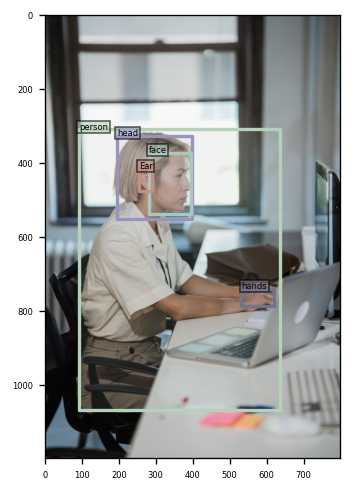

In [ ]:
image, targets = dataset_val[100]

box_label = [id2name[int(item)] for item in targets['labels']]
gt_dict = {
    'boxes': targets['boxes'],
    'image': targets['image_id'],
    'size': targets['size'],
    'box_label': box_label,
}
vslzr = COCOVisualizer()
vslzr.visualize(image, gt_dict,savedir=None)

In [ ]:
output = model.cuda()(image[None].cuda())
output = postprocessors['bbox'](output, torch.Tensor([[1.0,1.0]]).cuda())[0]

/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


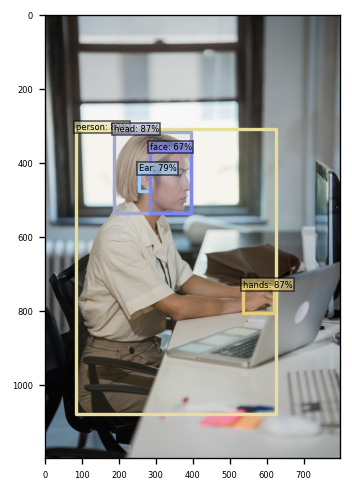

In [ ]:
threshold = 0.3
scores = output['scores']
labels = output['labels']
boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
select_mask = scores > threshold

box_label = [id2name[int(item)] + f": {scr:.0%}" for item,scr in torch.stack([labels[select_mask], scores[select_mask]], dim=1)]
pred_dict = {
    'boxes': boxes[select_mask],
    'size': targets['size'],
    'box_label': box_label
}

vslzr.visualize(image, pred_dict, savedir=None)

# Obtain output

In [ ]:
import os

test_path = '/content/test/images'
val_path = '/content/dataset/val2017'

test_output_dict = {}
val_output_dict = {}

In [ ]:
from PIL import Image
import datasets.transforms as T
from tqdm import tqdm
threshold = 0.25
target_size = 1200
for file in tqdm(os.listdir(val_path)):
  if file.lower().endswith('jpeg') or file.lower().endswith('jpg'):
    image = Image.open(os.path.join(val_path,file))
    orig_w, orig_h = image.size
    if orig_w > orig_h:
      new_w = target_size
      new_h = int(target_size*orig_h/orig_w)
    else:
      new_h = target_size
      new_w = int(target_size*orig_w/orig_h)

    scale_w = orig_w/new_w
    scale_h = orig_h/new_h
    image = image.resize((new_w,new_h))
    transform = T.Compose([
        T.ToTensor(),
        T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
    ])
    image, _ = transform(image, None)

    output = model.cuda()(image[None].cuda())
    output = postprocessors['bbox'](output, torch.Tensor([[1.0,1.0]]).cuda())[0]

    scores = output['scores']
    labels = output['labels']
    labels = labels[select_mask]
    boxes = output['boxes'] * torch.Tensor([image.shape[2],image.shape[1],image.shape[2],image.shape[1]]).cuda()
    boxes = boxes[select_mask]
    boxes = boxes.cpu().numpy().tolist()
    boxes = [[
        box[0] * scale_w,
        box[1] * scale_h,
        box[2] * scale_w,
        box[3] * scale_h,
    ] for box in boxes]
    select_mask = scores > threshold

    # box_label = [id2name[int(item)] + f": {scr:.0%}" for item,scr in torch.stack([labels[select_mask], scores[select_mask]], dim=1)]
    pred_dict = {
        'boxes': boxes,
        'labels': labels.cpu().numpy().tolist()
    }

    val_output_dict[f'{file}'] = pred_dict

100%|██████████| 2160/2160 [42:21<00:00,  1.18s/it]


In [ ]:
from PIL import Image
import datasets.transforms as T
from tqdm import tqdm
threshold = 0.3
target_size = 1200
for file in tqdm(os.listdir(test_path)):
  if file.lower().endswith('jpeg') or file.lower().endswith('jpg'):
    image = Image.open(os.path.join(test_path,file))
    orig_w, orig_h = image.size
    if orig_w > orig_h:
      new_w = target_size
      new_h = int(target_size*orig_h/orig_w)
    else:
      new_h = target_size
      new_w = int(target_size*orig_w/orig_h)

    scale_w = orig_w/new_w
    scale_h = orig_h/new_h
    image = image.resize((new_w,new_h))
    transform = T.Compose([
        T.ToTensor(),
        T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
    ])
    image, _ = transform(image, None)

    output = model.cuda()(image[None].cuda())
    output = postprocessors['bbox'](output, torch.Tensor([[1.0,1.0]]).cuda())[0]

    scores = output['scores']
    labels = output['labels']
    labels = labels[select_mask]
    boxes = output['boxes'] * torch.Tensor([image.shape[2],image.shape[1],image.shape[2],image.shape[1]]).cuda()
    boxes = boxes[select_mask]
    boxes = boxes.cpu().numpy().tolist()
    boxes = [[
        box[0] * scale_w,
        box[1] * scale_h,
        box[2] * scale_w,
        box[3] * scale_h,
    ] for box in boxes]
    select_mask = scores > threshold

    # box_label = [id2name[int(item)] + f": {scr:.0%}" for item,scr in torch.stack([labels[select_mask], scores[select_mask]], dim=1)]
    pred_dict = {
        'boxes': boxes,
        'labels': labels.cpu().numpy().tolist()
    }

    test_output_dict[f'{file}'] = pred_dict

100%|██████████| 1620/1620 [32:44<00:00,  1.21s/it]


In [ ]:
with open('/content/drive/MyDrive/valid_b09901142.json','w') as output_file:
  json.dump(val_output_dict, output_file, indent=4)

In [ ]:
with open('/content/drive/MyDrive/test_b09901142.json','w') as output_file:
  json.dump(test_output_dict, output_file, indent=4)